In [144]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import riskkit as erk
import scipy.stats as stats
import exp
from scipy.stats.mstats import gmean

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 6 games: max = 1.84 at 0.30
 7 games: max = 2.29 at 0.34
 8 games: max = 2.25 at 0.30
 9 games: max = 2.79 at 0.33
10 games: max = 2.76 at 0.30


<AxesSubplot:>

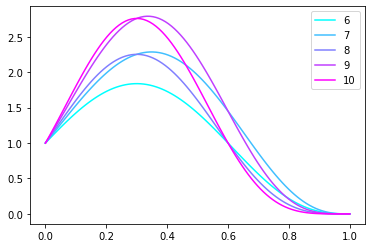

In [104]:
fractions = np.linspace(0, 1, 100)
data = {}
for n_games in range(6, 11):
    medians = np.array([exp.play_games(f, n_games, 3.5).median() for f in fractions])
    data[str(n_games)] = medians
    print('{: >2d} games: max = {:.2f} at {:.2f}'.format(n_games, medians.max(), fractions[medians.argmax()]))
df = pd.DataFrame(data, fractions)
df.plot(cmap='cool')

<AxesSubplot:>

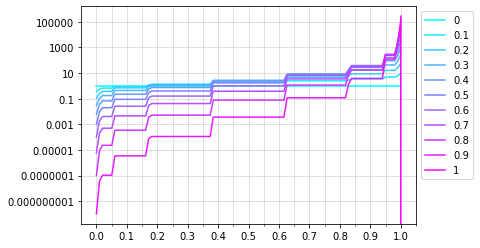

In [445]:
games = {exp.fformat(f): exp.play_games(f, 10, 3.5) for f in np.linspace(0, 1, 11)}
quantiles = exp.game_quantiles(games)
exp.plot_quantile(quantiles)

count    256.000000
mean      12.776785
std       48.209120
min        0.003906
25%        0.355957
50%        1.601807
75%        7.208130
max      656.840836
dtype: float64


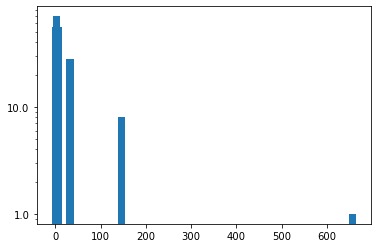

In [449]:
games = exp.play_games(.5, 8, 3.5)
print(games.describe())
exp.plot_histogram(games, proportional=True)

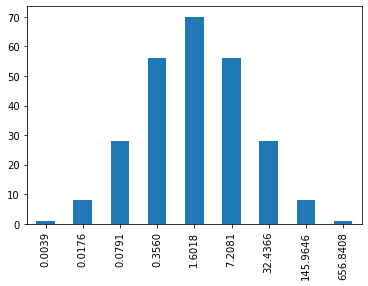

In [448]:
exp.plot_histogram(games, proportional=False)

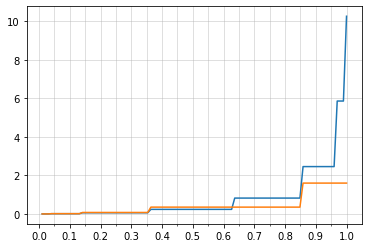

In [474]:
qs = np.linspace(0, 1, 100)
means = [games[games < games.quantile(q)].mean() for q in qs]
medians = [games[games < games.quantile(q)].median() for q in qs]

fig, ax = plt.subplots()
ax.plot(qs, means)
ax.plot(qs, medians)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.grid(b=True, which='both', alpha=.5)

In [492]:
np.array([np.random.uniform() < .5 for i in range(100000)]).mean()

0.49881

In [583]:
f = .3
length = 10
stop = lambda i, v: i >= length
n = 50

games = [exp.play_game(f, stop, series=False) for i in range(n)]
print('\nSimulating')
print(pd.Series(games).describe())

print('\nAll scenarios')
print(exp.play_games(f, 10).describe())


Simulating
count    50.000000
mean      2.079204
std       3.230401
min       0.251067
25%       0.520068
50%       1.077284
75%       2.231517
max      19.833989
dtype: float64

All scenarios
count    1024.000000
mean        2.061032
std         3.025623
min         0.028248
25%         0.520068
50%         1.077284
75%         2.231517
max        41.084691
dtype: float64


2.5600000000000005

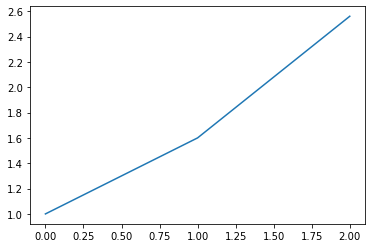

In [892]:
game = exp.play_game(.4, lambda i, v: v >= 2)
game.plot()
game.iloc[-1]

In [1105]:
simulations = 500_000
stop = lambda i, v: v >= 2

fs = np.linspace(0, 1, 50)
f_lengths = []
f_values = []
for f in fs:
    lengths = []
    values = []
    for i in range(simulations):
        ans = exp.play_game(f, stop, series=False)
        lengths.append(ans['length'])
        values.append(ans['value'])
    f_lengths.append(pd.Series(lengths))
    f_values.append(pd.Series(values))
len(f_values)

KeyboardInterrupt: 

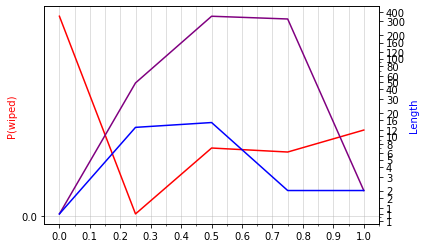

In [1103]:
p_wiped = [v[v < .001].size / d.size for v in f_values]
p_fail = [v[v < 2].size / d.size for v in f_values]
length_mean = [l[l < penalizer].mean() for l in f_lengths]
length_median = [l[l < penalizer].median() for l in f_lengths]
fig, ax1 = plt.subplots()
color = 'red'
ax1.plot(fs, p_fail, color=color)
ax1.set_ylabel('P(wiped)', color=color)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax1.grid(b=True, which='both', alpha=.5)
ax2 = ax1.twinx()
color = 'blue'
ax2.plot(fs, length_mean, color='purple')
ax2.plot(fs, length_median, color=color)
ax2.set_ylabel('Length', color=color)
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.yaxis.set_major_locator(ticker.LogLocator(subs=(.12, .16, .2, .3, .4, .5, .6, .8, 1)))


P(wiped) = 0.0%, times = 0


count    100000.000000
mean         39.793370
std          54.082423
min           5.000000
25%          10.000000
50%          21.000000
75%          46.000000
max         977.000000
dtype: float64

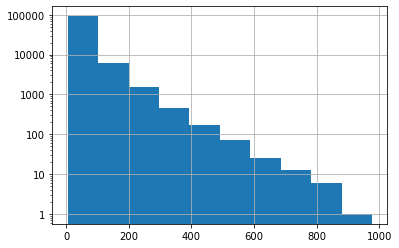

In [1088]:
i = np.where(np.abs(fs - .15) < .01)[0][0]
d = f_durations[i]
d_wiped = d[d >= penalizer]
p_wiped = d_wiped.size / d.size
print('P(wiped) = {}%, times = {}'.format(p_wiped * 100, d_wiped.size))
ax = d.hist()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
d.describe()

<AxesSubplot:>

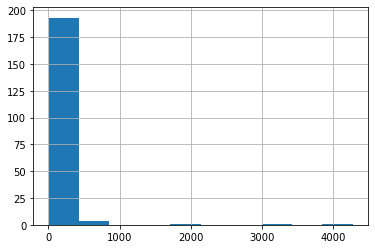

In [964]:
f = .3
durations = []
for i in range(simulations):
    length = exp.play_game(f, stop, result='length', ko_length=penalizer)
    durations.append(length)
durations = pd.Series(sorted(durations))
durations.hist()

In [1007]:
f_durations[0].value_counts()[penalizer]/f_durations[0].size

1.0

In [1005]:
series.count?

Signature: series.count(level=None)
Docstring:
Return number of non-NA/null observations in the Series.

Parameters
----------
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a smaller Series.

Returns
-------
int or Series (if level specified)
    Number of non-null values in the Series.

See Also
--------
DataFrame.count : Count non-NA cells for each column or row.

Examples
--------
>>> s = pd.Series([0.0, 1.0, np.nan])
>>> s.count()
2
File:      ~/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py
Type:      method


In [998]:
a.count?

Signature: a.count(value, /)
Docstring: Return number of occurrences of value.
Type:      builtin_function_or_method
